In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data =pd.read_csv("C:/Users/HP/workspace/Real Estate Prediction Project/dataset/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [6]:
data.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
#droping columns that are essentially not useful to determining our house price

data1 = data.drop(['area_type', 'society', 'balcony', 'availability'], axis= 1)

In [16]:
#handling the na values
data2 = data1.dropna()
data2.shape

(13246, 5)

In [18]:
#exploring the size column and clearing and tokenising it
view = data2['size'].unique()

#creating a new tokenized size column
data2['bhk'] = data2['size'].apply(lambda x: int(x.split(" ")[0]))

C:\Users\HP\AppData\Local\Temp/ipykernel_9584/2659223786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bhk'] = data2['size'].apply(lambda x: int(x.split(" ")[0]))


In [19]:
data2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [22]:
#exploring the total_sqft column
vi = data2.total_sqft.unique()
# defining a function to convert the range values in the total_square column

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
        

In [24]:
data2[~data2["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [30]:
#writing a function  to convert the range values to float
def convert_sqft_to_num(x):
    token = x.split("-")
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
convert_sqft_to_num('2166')

2166.0

In [32]:
data3 = data2.copy()
data3['total_sqft'] = data3['total_sqft'].apply(convert_sqft_to_num)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [36]:
#feature engineering and dimensionality reduction 
#creating price per square fit column

data4 = data3.copy()
data4['price_per_sqft'] = data4['price']*100000/data4['total_sqft']

In [37]:
data4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [44]:
#exploring the location column
data4.location == data4.location.apply(lambda x: x.strip())
location_stats = data4['location'].value_counts(ascending=False)

location_stats1 = data4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [45]:
location_stats

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [46]:
len(location_stats[location_stats<=10])

1063

In [47]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1063, dtype: int64

In [48]:
#converting location that are less that 10 to other
data4.location = data4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data4.location.unique())

242

In [52]:
#outlier detection and remover
#checcking the data points where the sqft is less than 300(threshold)
check = data4[data4.total_sqft/data4.bhk<300]

#removing the outliers
data5 = data4[~(data4.total_sqft/data4.bhk<300)]

In [54]:
data5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [55]:
#writing a function that can remove extreme cases of high price_per_sqft per location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
    
data6 = remove_pps_outliers(data5)
data6.shape

(10244, 7)

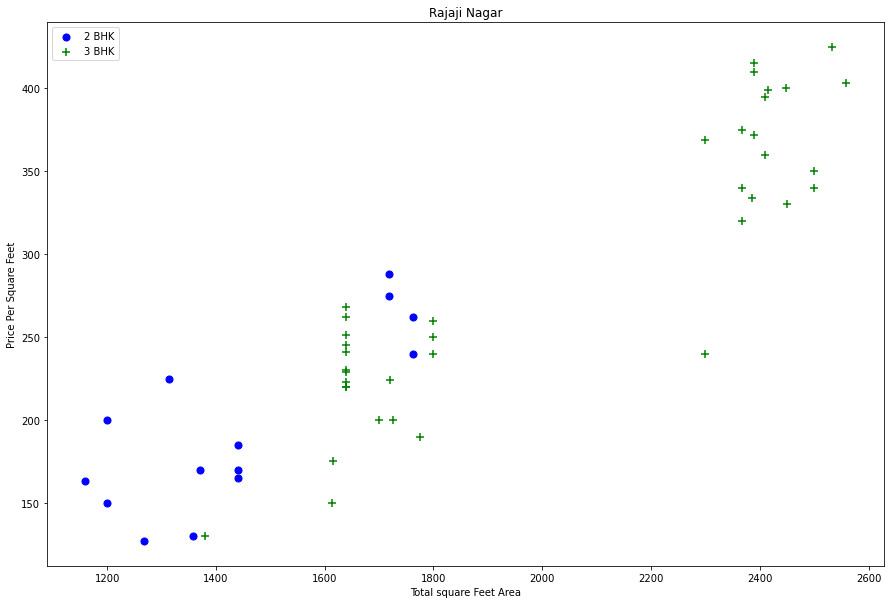

In [58]:
#function for data visualisation of the 2&3 bedroom case senerior

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label = '3 BHK', s=50)
    plt.xlabel("Total square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()


plot_scatter_chart(data6, "Rajaji Nagar")

In [61]:
#fnction to remove those 2 BHK apartment whose price_per_sqft is less than
#mean price price_per_sqft of 1bHK apartment

def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft), 
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')
            
data7 = remove_bhk_outlier(data6)
data7.shape
            

(7342, 7)

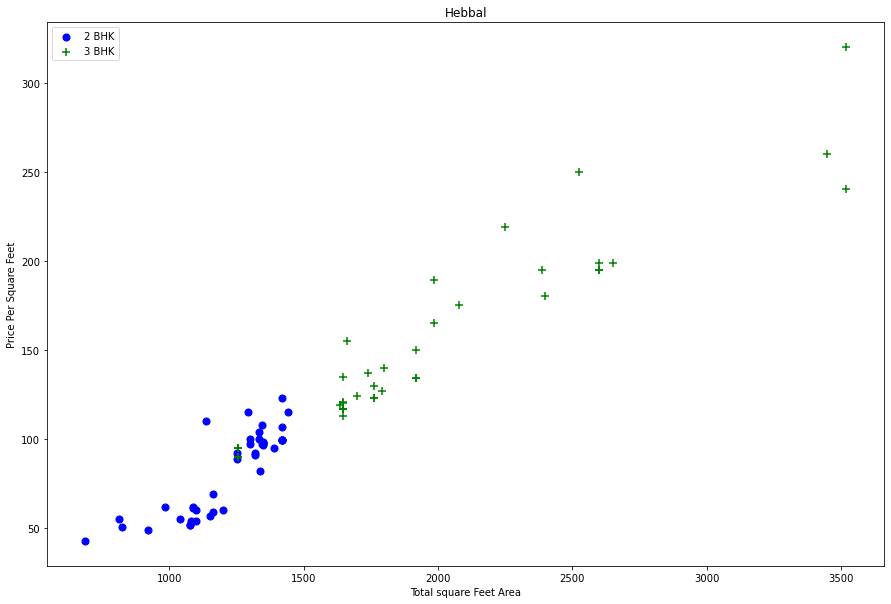

In [63]:
plot_scatter_chart(data7, "Hebbal")

Text(0, 0.5, 'count')

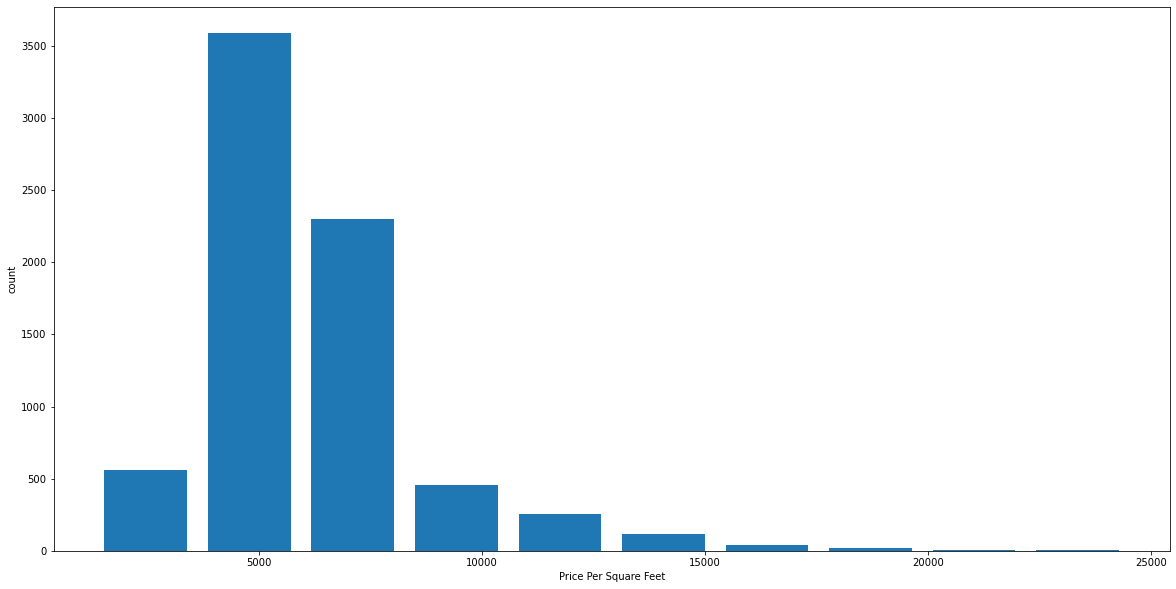

In [64]:
#ploting  a histogram to see hoow many apartment are there per_sqft Area
plt.rcParams['figure.figsize'] = (20,10)
plt.hist(data7.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('count')

In [66]:
#removing the outliers on the bath columns. every datapoint having 2bathroom more than bedbroom is categorized 
# as an outlier

data8 = data7[data7.bath < data7.bhk+2]
data8.shape

(7264, 7)

In [67]:
#droping the unneccessary features like price_per_sqft and size

data9 = data8.drop(['size', 'price_per_sqft'], axis = 'columns')

In [73]:
#creating a machine learning model for price prediction 
#using onehot encoding on the location column

dummies = pd.get_dummies(data9.location)

#concatingn the dummies + the original data
data10 = pd.concat([data9, dummies.drop('other', axis = 'columns')], axis = 'columns')

data11 = data10.drop('location', axis= 'columns')
data11.head(10)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1130.0,2.0,36.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1417.0,2.0,76.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1230.0,2.0,58.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1705.0,3.0,75.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1116.0,2.0,47.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data11.shape

(7264, 245)

In [99]:
#creating x and y datapoint of training the machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


X = data11.drop('price', axis ='columns')
y = data11.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.7696224927820411

In [100]:
#using kfold validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)
cross_val_score(lr_model, X, y, cv=cv )

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

In [101]:
#using gridsearchcv
#hyper-parameter tunning
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
            
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.845404,{'normalize': True}
1,lasso,0.709536,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.680093,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [109]:
#writing the predict function

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index] =  1
    return lr_model.predict([x])[0]
        


In [114]:
predict_price('1st phase JP Nagar', 1000, 3,3)

C:\Users\HP\AppData\Local\Temp/ipykernel_9584/4215978816.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:


80.72503209448307

In [115]:
predict_price('Indira Nagar', 1000, 2, 2)

187.67843779863284

In [116]:
#exporting the model to the pickle file
import pickle
with open ('banglore_home_price_model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [117]:
#exporting the columns labels which will be usefull for prediction

import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))